In [1]:
"""
requirements:
    tensorflow: 2.4.1
    numpy: 1.19.5
    keras: 2.4.3
    pandas: 1.1.5
"""
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf

In [2]:
# 载入google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/SentimentAnalysis/corpus/5moods/train/usual_trainTrimed.csv')
Labels, Reviews = df['label'].astype('str'), df['review'].astype('str')

(0       angry
 1       happy
 2     neutral
 3     neutral
 4    surprise
 Name: label, dtype: object,
 0                   气死 姐姐 快二是 阵亡 吗 尼玛 一个半 小时 过去 也 没 上车
 1                妞妞 今天 又 承办 一个 发文 登记 文号 是 嘻 么 么 哒 晚安 哟
 2               还 值得注意 另 一个 事实 张鞠存 原有 一个 东溪 草堂 为 其 读书处
 3    这 在 前 华约 国家 尤其 是 东德 使用 的 首次 联合演习 期间 被 一些 北约组织 ...
 4                                                    上
 Name: review, dtype: object)

In [4]:
# 打乱并分割数据集
from sklearn.model_selection import train_test_split

# random_state表示随机数种子
Labels_train, Labels_test, Reviews_train, Reviews_test = train_test_split(
    Labels, Reviews, 
    test_size=0.3, random_state=0
)

(9806        happy
 2206     surprise
 10048     neutral
 13965       happy
 16766       angry
 Name: label, dtype: object,
 9806                累死 活动 结束 哈哈 洗澡 睡觉 咯 玩命 速递 好好看 奥迪 好帅 晚安
 2206          在 安静 的 环境 下 闭眼 感受 一种 灯光 从亮 到 暗到 黑 一种 奇怪 的 感觉
 10048    接上 读书 分享 中 班级 热爱 读书 的 同学 分享 最近 读书 的 心得 并 为 班级 ...
 13965    写 完 东西 到 阳台 看看 睡莲 缸 里 的 小龟 哈哈 龟 原来 是 睡觉 的 闭 眼睛 好萌
 16766                                           人 竖 中指 好 吗
 Name: review, dtype: object)

In [5]:
"""
Tokenize words
String to INT
"""

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# 最长评论长度
# 此处有其他的处理方法：因为可能存在部分review过长，导致max_len很大
max_len = max(map(len, Reviews))

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Reviews_train)
reviews_train = tokenizer.texts_to_sequences(Reviews_train)
reviews_test = tokenizer.texts_to_sequences(Reviews_test)

# 查看结果
for text, vector in zip(Reviews_train[:3], reviews_train[:3]):
    print(text)
    print(vector)

# 固定长度
# 向量填充

reviews_train = pad_sequences(reviews_train, max_len)
reviews_test = pad_sequences(reviews_test, max_len)

累死 活动 结束 哈哈 洗澡 睡觉 咯 玩命 速递 好好看 奥迪 好帅 晚安
[1353, 621, 362, 382, 898, 109, 762, 7898, 20687, 3432, 7899, 5008, 182]
在 安静 的 环境 下 闭眼 感受 一种 灯光 从亮 到 暗到 黑 一种 奇怪 的 感觉
[4, 968, 1, 1201, 81, 2793, 423, 168, 3731, 20688, 21, 20689, 584, 168, 998, 1, 41]
接上 读书 分享 中 班级 热爱 读书 的 同学 分享 最近 读书 的 心得 并 为 班级 同学 推荐 有 意义 的 书籍 在 写作 方面 已 小有成就 的 胡仕林 同学 为 同学们 介绍 的 写作 经验 并 为 同学们 推荐 张德芬 的 都市 心灵 三部曲
[7900, 1673, 690, 50, 2471, 4517, 1673, 1, 432, 690, 100, 1673, 1, 9839, 133, 49, 2471, 432, 1611, 9, 946, 1, 7901, 4, 3433, 1166, 222, 20690, 1, 20691, 432, 49, 3213, 1543, 1, 3433, 899, 133, 49, 3213, 1611, 13249, 1, 7902, 2237, 20692]


(215,
 215,
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,  

In [6]:
# mood to int and int to mood dict
mood_to_int = {
    'sad':0,
    'angry': 1,
    'fear': 2,
    'neutral': 3,
    'surprise': 4,
    'happy': 5,
}
int_to_mood = {k:i for k, i in enumerate(mood_to_int)}

{0: 'sad', 1: 'angry', 2: 'fear', 3: 'neutral', 4: 'surprise', 5: 'happy'}


In [7]:
"""
one-hot编码label
"""
from tensorflow.keras import utils

labels_train = np.array([mood_to_int[x] for x in Labels_train], dtype=int)
labels_train = utils.to_categorical(labels_train) 
labels_test = np.array([mood_to_int[x] for x in Labels_test], dtype=int)
labels_test = utils.to_categorical(labels_test)

(array([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.]], dtype=float32))

In [15]:
"""
构建模型
"""

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout

vocabulary_size = len(tokenizer.word_index) + 1
print(vocabulary_size)

model = Sequential()

model.add(Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(LSTM(12, return_sequences=False, dropout=0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

49083
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          1570656   
_________________________________________________________________
lstm_1 (LSTM)                (None, 12)                2160      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
Total params: 1,572,894
Trainable params: 1,572,894
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 训练
history = model.fit(
    reviews_train, labels_train, batch_size=32, epochs=10,
    validation_data=(reviews_test, labels_test)
)

Epoch 1/10
608/608 [==============================] - 57s 91ms/step - loss: 1.6245 - accuracy: 0.3148 - val_loss: 1.3497 - val_accuracy: 0.4567
Epoch 2/10
608/608 [==============================] - 57s 94ms/step - loss: 1.2554 - accuracy: 0.5166 - val_loss: 1.1457 - val_accuracy: 0.5792
Epoch 3/10
608/608 [==============================] - 57s 94ms/step - loss: 1.0367 - accuracy: 0.6178 - val_loss: 1.0558 - val_accuracy: 0.6178
Epoch 4/10
608/608 [==============================] - 57s 94ms/step - loss: 0.9340 - accuracy: 0.6640 - val_loss: 1.0178 - val_accuracy: 0.6317
Epoch 5/10
608/608 [==============================] - 57s 94ms/step - loss: 0.8324 - accuracy: 0.7094 - val_loss: 0.9842 - val_accuracy: 0.6465
Epoch 6/10
608/608 [==============================] - 57s 94ms/step - loss: 0.7620 - accuracy: 0.7339 - val_loss: 0.9714 - val_accuracy: 0.6566
Epoch 7/10
608/608 [==============================] - 57s 94ms/step - loss: 0.7119 - accuracy: 0.7515 - val_loss: 1.0009 - val_accuracy:

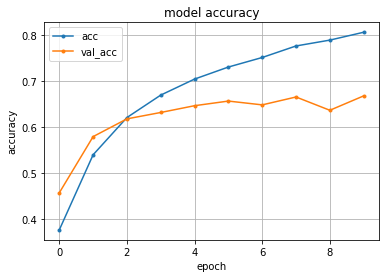

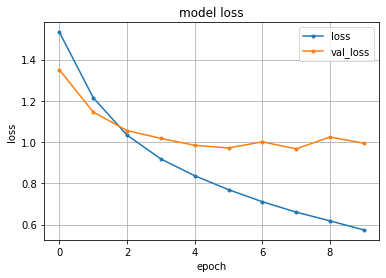

In [17]:
from matplotlib import pyplot as plt

# 精度
plt.plot(history.history['accuracy'], marker='.', label='acc')
plt.plot(history.history['val_accuracy'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# loss
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [18]:
# 模型测试
input_text = ["小席 是 我 的 女儿"]
input_text = tokenizer.texts_to_sequences(input_text)
input_text = pad_sequences(input_text, maxlen=max_len)
pre = model.predict(input_text)
pre_ans = pre.argmax()
print(pre_ans, int_to_mood[pre_ans])

5 happy


In [19]:
# 模型测试
input_texts = ['开 心', '伤 心', '开', '伤', '心']
input_texts = tokenizer.texts_to_sequences(input_texts)
input_texts = pad_sequences(input_texts, maxlen=max_len)
preds = model.predict(input_texts)
for pred in preds:
    pred_ans = pred.argmax()
    print(pred, pred_ans, int_to_mood[pred_ans])

[0.4919284  0.23215115 0.00850639 0.04137892 0.11919321 0.10684195] 0 sad
[0.7572935  0.13333556 0.00471    0.01648443 0.03847589 0.04970047] 0 sad
[0.20885882 0.13440242 0.01979318 0.12821764 0.37008598 0.13864194] 4 surprise
[0.5471682  0.11630087 0.01637925 0.06521725 0.1603468  0.09458771] 0 sad
[0.5538301  0.18509229 0.01011955 0.03714809 0.11995485 0.09385516] 0 sad


In [ ]:
"""
对模型进行测试
"""
df = pd.read_csv('/content/drive/MyDrive/SentimentAnalysis/corpus/5moods/train/usual_trainTrimed.csv')
Labels_val, Reviews_val = df['label'].astype('str'), df['review'].astype('str')

reviews_val = tokenizer.texts_to_sequences(Reviews_val)
reviews_val = pad_sequences(reviews_val, max_len)
labels_val = [mood_to_int[x] for x in Labels_val]

In [34]:
preds = model.predict(reviews_val)
preds = preds.argmax(axis=1)

In [35]:
from sklearn import metrics
print(metrics.classification_report(labels_val, preds))
print("准确率:", metrics.accuracy_score(labels_val, preds))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      4990
           1       0.84      0.87      0.85      8344
           2       0.73      0.72      0.72      1220
           3       0.87      0.86      0.86      5749
           4       0.63      0.62      0.63      2086
           5       0.83      0.77      0.80      5379

    accuracy                           0.80     27768
   macro avg       0.76      0.76      0.76     27768
weighted avg       0.80      0.80      0.80     27768

准确率: 0.7957360991068856
